# Predicting the Survivors of the Titanic

##### [Info about the data](#info)
## [Exploratory data analysis](#explore_data)
## [Determine what variables to keep](#variables_keep)
#### [Map gender](#gender)
## [Data Visualisation](#data_viz)
#### [Dealing with outliers](#outliers)
## [](#)
## [Feature scaling](#feature_scaling)

## [](#)
## [](#)
## [](#)

## Plan 

1. Get the data
    1. Explore the variables
2. Clean the data - get it ready for pre-processing
    1. Decide what to do with missing entries
3. Pre-process (scale)
4. Select model
5. Train model
6. Evaluate model
7. Test model and submit predictions

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [252]:
raw_data = pd.read_csv('train.csv')
train = raw_data.copy()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Info about the variables <a id='info' ><a/>
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Exploring the data <a id='explore_data' ><a/>

In [253]:
# get basic descriptives of data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualise the data <a id='data_viz' ><a/>

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

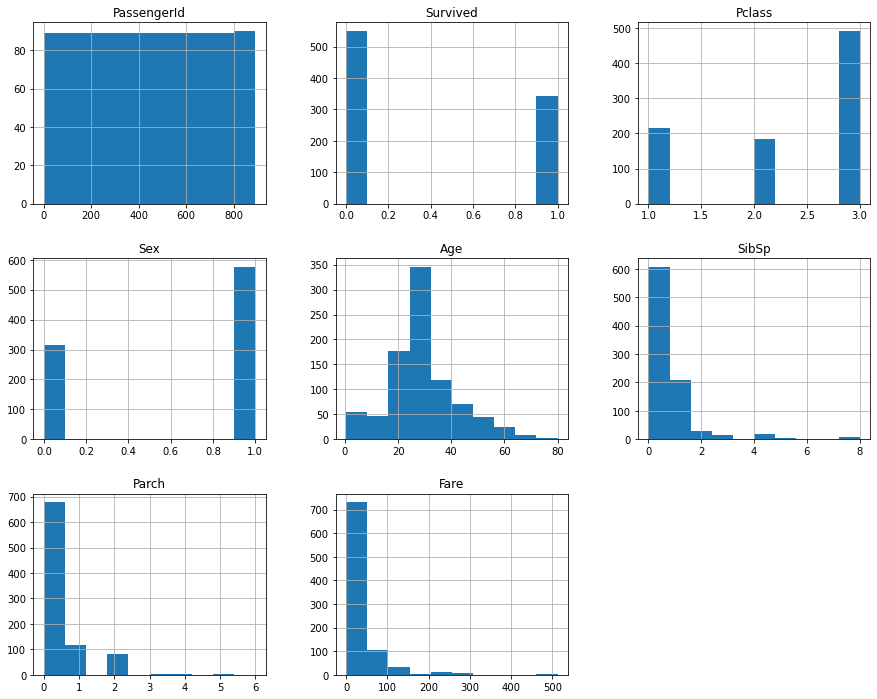

In [272]:
# usehistogram to view the frequency distributions of each variable
train.hist(figsize=(15,12))

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

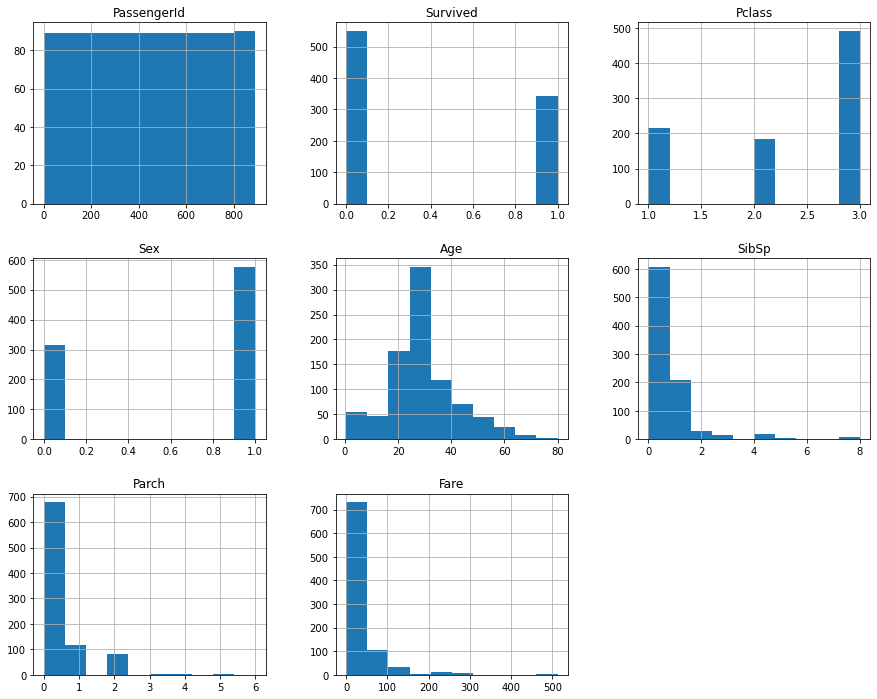

In [273]:
pd.DataFrame.hist(train, figsize=(15,12))

## Deal with outliers <a id='outliers' ><a/>
    
* We can see that fare has outliers, the 75th percentile is lower than the mean!...so let's get rid of anything above the 75th percentile...

In [254]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [255]:
# look for missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* We have missing values in the Age, Cabin and Embarked categories.
* We'll need to decide what to do with these later - probably use the median or mean for age.

### Determine what variables we want to keep... <a id='variables_keep' ><a/>

#### Tickets

In [256]:
# are there differences in the type of tickets that might be important
# check how many unqiue values there are for tickets
unique_tickets = np.unique(train['Ticket'])
len(unique_ticekts)

681

The majority of tickets are unique (681 unique ticket values out of 891 tickets) which suggests that there isn't going to be much insight or patterns that we can derive from this, particularly as we have 'Fare' as a variable...

In [257]:
# drop the ticket column
train = train.drop('Ticket', axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


#### Name

In [258]:
# the name column is all unique values so we drop it too
train = train.drop('Name', axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


#### Embarked

In [259]:
# given we have the cabin that each traveller is in, the location they boarded the ship is unlikely to be 
# relevant to survival
train = train.drop('Embarked', axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,22.0,1,0,7.2500,NaN
1,2,1,1,female,38.0,1,0,71.2833,C85
2,3,1,3,female,26.0,0,0,7.9250,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123
4,5,0,3,male,35.0,0,0,8.0500,NaN


#### Cabin

In [260]:
# remind ourselves of missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
dtype: int64

The majority of the cabin data is missing so we should drop this column.

In [261]:
train = train.drop('Cabin', axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


#### Age
* We have 177 age values missing which equates to about 20% of our total dataset. 
* We want to be able to train our modelon as much data as possible, so getting rid of 177 records isn't overly appealing. However, replacing with the mean or median may skew the data and accuracy of the model. 
* We essentially have 2 options:
    1. Drop the records that contain missing age values
    2. Use the median or mean and see how our model performs...
    
    
Let's keep the records and replace the missing age with the median age, which we know, from earlier, is 28.

In [262]:
# check how many values there are of the median age in the age column
(train['Age'] == 28).sum()

25

In [263]:
# fill the age value with the median age
train['Age'].fillna(value=train['Age'].median(), inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [264]:
# check how many of median value in age there are now
(train['Age'] == 28).sum()

202

## Map gender <a id='gender' ><a/>

In [265]:
# change all the sex entries to lower case (some of them may be capitalised which amy affect mapping)
sex = train['Sex'].str.lower()
# change male to 1 and female to 0
train['Sex'] = sex.map({'male': 1, 'female': 0})
# check the output
train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

## Look for patterns between survived and the other variables <a id='patterns' ><a/>

* percentages of survival rates and fare prices
* try to identify correlation between variables
* e.g., what % of makes vs. females survived
* were survival numbers higher in more expensive tickets or socio-economic classes
* identify relatioonships so we can only use the most relevant features in our model
* Would categorising age to <16, 16-25 etc. be useful?


Also need to think about creating a function that cleans the data and only inputs the features we want when receive new data?



In [266]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [267]:
# what % of males vs females survived
train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [268]:
# get an idea of male vs female survvial rate
train.groupby(['Survived', 'Sex']).agg(['count', 'mean'])

PassengerId             Pclass             Age            SibSp  \
                   count        mean  count      mean count       mean count   
Survived Sex                                                                   
0        0            81  434.851852     81  2.851852    81  25.666667    81   
         1           468  449.121795    468  2.476496   468  30.783120   468   
1        0           233  429.699571    233  1.918455   233  28.716738   233   
         1           109  475.724771    109  2.018349   109  27.382294   109   

                       Parch            Fare             
                  mean count      mean count       mean  
Survived Sex                                             
0        0    1.209877    81  1.037037    81  23.024385  
         1    0.440171   468  0.207265   468  21.960993  
1        0    0.515021   233  0.515021   233  51.938573  
         1    0.385321   109  0.357798   109  40.821484

In [269]:
# how many males and females survived
print(f"""
Males survived: {len(train[(train['Sex']==1) & (train['Survived']==1)])}
Females survived: {len(train[(train['Sex']==0) & (train['Survived']==1)])} 

Males did not survive: {len(train[(train['Sex']==1) & (train['Survived']==0)])}
Females did not survive: {len(train[(train['Sex']==0) & (train['Survived']==0)])}

Percentage breakdown: 

Male survival: {len(train[(train['Sex']==1) & (train['Survived']==1)]) / len(train_data['Survived'])*100} %
Female survival: {len(train[(train['Sex']==0) & (train['Survived']==1)]) / len(train_data['Survived'])*100} %

Males did not survive: {len(train[(train['Sex']==1) & (train['Survived']==0)]) / len(train['Survived'])*100} %
Females did not survive: {len(train[(train['Sex']==0) & (train['Survived']==0)]) / len(train['Survived'])*100} %

""")


Males survived: 109
Females survived: 233 

Males did not survive: 468
Females did not survive: 81

Percentage breakdown: 

Male survival: 12.2334455667789 %
Female survival: 26.15039281705948 %

Males did not survive: 52.52525252525253 %
Females did not survive: 9.090909090909092 %




The above is definitely not the quickest way to get that info, below is better way (equivalent of a COUNTIF function)

In [270]:
# get sum of males that survived and females that survived
print(f"Males survived: {sum((train.Sex == 1) & (train.Survived == 1))}")
print(f"Females survived: {sum((train.Sex == 0) & (train.Survived == 1))}")
print(f"Males did not survive: {sum((train.Sex == 1) & (train.Survived == 0))}")
print(f"Females did not survive: {sum((train.Sex == 0) & (train.Survived == 0))}")

Males survived: 109
Females survived: 233
Males did not survive: 468
Females did not survive: 81


In [271]:
corr_matrix = train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

## Select a model and train it

1. Split the training data into a training and test set
2. Select the model
3. Train (fit) the model on the training data
4. Test it on the testing split
5. Run it on the unseen test data and subit to Kaggle

In [274]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [275]:
# split the data set into training and testing
train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

In [276]:
test_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
709,710,1,3,1,28.0,1,1,15.2458
439,440,0,2,1,31.0,0,0,10.5000
840,841,0,3,1,20.0,0,0,7.9250
720,721,1,2,0,6.0,0,1,33.0000
39,40,1,3,0,14.0,1,0,11.2417


In [277]:
# separate the predictors from the targets
X_train = train_set.drop('Survived', axis=1)
y_train = train_set['Survived']
X_test = test_set.drop('Survived', axis=1)
y_test = test_set['Survived']

Now we have a set of predictors and targets that we can train the model on (X_train and y_train) and then a set of predictors to test it on (X_test) and the targets for us to evaluate the predictions on (y_test).

So, now we need to fit the model on the training data...

In [281]:
# scale the trainig data set
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [282]:
# create an instance of the model
log_reg = LogisticRegression()

# fit the model
log_reg.fit(X_scaled, y_train)

LogisticRegression()

We now have a working Logistic Regression model! Let's test it out!..

## Test the data on the test set

In [283]:
# scale the test data
X_test_scaled = scaler.transform(X_test)

# print the predictions that the model provides
print(f"Predictions: ", log_reg.predict(X_test_scaled))

# print the targets so we can assess accuracy
print(f"Labels: ", list(y_test))

Predictions:  [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
Labels:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]


In [286]:
log_reg.predict_proba(X_test_scaled)

array([[0.91653207, 0.08346793],
       [0.76930433, 0.23069567],
       [0.84051019, 0.15948981],
       [0.08820031, 0.91179969],
       [0.34154272, 0.65845728],
       [0.05761103, 0.94238897],
       [0.35164117, 0.64835883],
       [0.90976136, 0.09023864],
       [0.27788825, 0.72211175],
       [0.07701229, 0.92298771],
       [0.67462236, 0.32537764],
       [0.92189213, 0.07810787],
       [0.58466508, 0.41533492],
       [0.90001634, 0.09998366],
       [0.80025411, 0.19974589],
       [0.04591654, 0.95408346],
       [0.67046443, 0.32953557],
       [0.32261976, 0.67738024],
       [0.71220467, 0.28779533],
       [0.67826767, 0.32173233],
       [0.87956472, 0.12043528],
       [0.57437091, 0.42562909],
       [0.36722784, 0.63277216],
       [0.84757028, 0.15242972],
       [0.88100871, 0.11899129],
       [0.92540222, 0.07459778],
       [0.65416002, 0.34583998],
       [0.75212743, 0.24787257],
       [0.93133238, 0.06866762],
       [0.36511854, 0.63488146],
       [0.

In [288]:
# assess accuracy of the model
log_reg.score(X_test_scaled, y_test)

0.8044692737430168